In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('EgoAlterProfiles.txt', sep="\t") # Import the data with tabulation as separator
Egos = data[data.IsEgo==1]["statuses_count"] # We take only the Ego users and their satues count

In [6]:
def get_ccdf(vals):
    # Input:
    # -- vals: an np.array of integers greater or equal to 0 ( this method doesn't include the value for the number of tweet = 0, 
    # we could eventually manually add it, but wee will understand better the problem in the analysis of the results just below and how this is corrected)
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals) + 2;
    # -- y: an array containing the (empirically calculated) probability that vals >= x
    
    y = np.cumsum(np.bincount(vals)) # bincount count number of occurrences for each value in the array so we must give all the range of vals
    y = y/y[-1]
    
    # Take the complementary probability, so it give us the probability that vals >= x
    y = 1-y 
    
    x = list(range(1, max(vals) + 2))
    
    return x, y

In [7]:
reddit_cumsum_fig1  = pd.read_csv('reddit_users_stats.csv') 
stackoverflowfig1a = pd.read_csv('post_by_user_stackoverflow.csv') 
weibo_cumsum = pd.read_csv('Weibo_powerlaw.csv') 
stackoverflow_ego = stackoverflowfig1a.id
Weibo_ego = weibo_cumsum.iloc[:,1]
reddit_Egos= reddit_cumsum_fig1.statuses_count

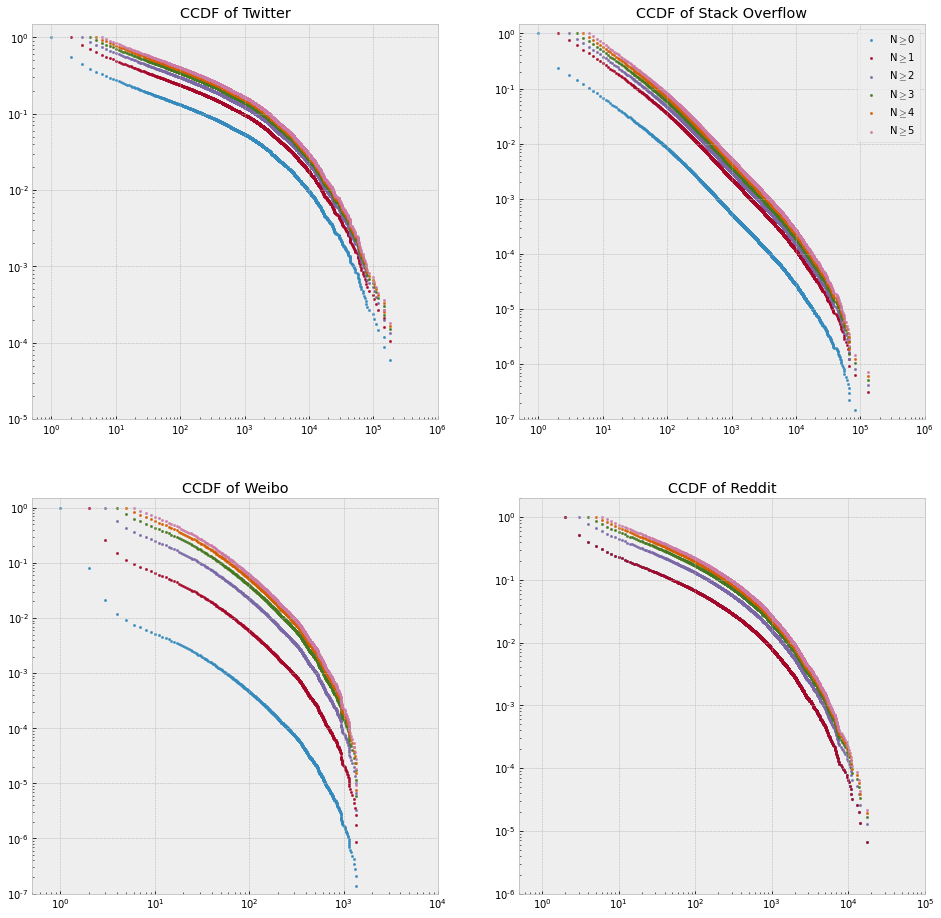

In [10]:
plt.style.use('bmh')
f, ax = plt.subplots(2,2,figsize=(16, 16))
#f.suptitle('Log-log plot of the complementary cumulative distribution functions of the number of post per user', fontsize=25)

#f.text(0.5, 0.04, 'Number of post', ha='center', fontsize=20)
#f.text(0.04, 0.5, 'Pr(x$\geq$X)', va='center', rotation='vertical', fontsize=20)

first_values = []
for i in range(6):
    x, y = get_ccdf(Egos[Egos>=i].astype(int) + 1 ) # We calculate the CCDF for the different N with a shift of +1 !
    Ego_ccdf = pd.DataFrame({'ccdf': y}, index = x) 
    Ego_ccdf = Ego_ccdf.drop_duplicates(subset = "ccdf", keep="last")
    ax[0,0].scatter(Ego_ccdf.index, Ego_ccdf.ccdf, s = 5)
    
ax[0,0].set_xlim((0.5,10**6))
ax[0,0].set_ylim((10**-5,1.5))
ax[0,0].set(xscale="log", yscale="log")
ax[0,0].set_title("CCDF of Twitter")


for i in range(6):
    x, y = get_ccdf(stackoverflow_ego[stackoverflow_ego>=i].astype(int) + 1 ) # We calculate the CCDF for the different N with a shift of +1 !
    Ego_ccdf = pd.DataFrame({'ccdf': y}, index = x) 
    Ego_ccdf = Ego_ccdf.drop_duplicates(subset = "ccdf", keep="last")
    ax[0,1].scatter(Ego_ccdf.index, Ego_ccdf.ccdf, s = 5,label="N$\geq${}".format(i)) 

ax[0,1].legend()
ax[0,1].set_xlim((0.5,10**6))
ax[0,1].set_ylim((10**-7,1.5))
ax[0,1].set(xscale="log", yscale="log")
ax[0,1].set_title("CCDF of Stack Overflow")


    
for i in range(6):
    x, y = get_ccdf(Weibo_ego[Weibo_ego>=i].astype(int) + 1 ) # We calculate the CCDF for the different N with a shift of +1 !
    Ego_ccdf = pd.DataFrame({'ccdf': y}, index = x) 
    Ego_ccdf = Ego_ccdf.drop_duplicates(subset = "ccdf", keep="last")
    ax[1,0].scatter(Ego_ccdf.index, Ego_ccdf.ccdf, s = 5) 
    

ax[1,0].set_xlim((0.5,10**4))
ax[1,0].set_ylim((10**-7,1.5))
ax[1,0].set(xscale="log", yscale="log")
ax[1,0].set_title("CCDF of Weibo")



for i in range(6):
    x, y = get_ccdf(reddit_Egos[reddit_Egos>=i].astype(int) + 1 ) # We calculate the CCDF for the different N with a shift of +1 !
    Ego_ccdf = pd.DataFrame({'ccdf': y}, index = x) 
    Ego_ccdf = Ego_ccdf.drop_duplicates(subset = "ccdf", keep="last")
    ax[1,1].scatter(Ego_ccdf.index, Ego_ccdf.ccdf, s = 5) 
    
ax[1,1].set_xlim((0.5,10**5))
ax[1,1].set_ylim((10**-6,2))
ax[1,1].set(xscale="log", yscale="log")
ax[1,1] = ax[1,1].set_title("CCDF of Reddit")



#twitter stack weibo reddit

In [9]:
import mpld3
mpld3.display(f)

C:\Users\kamya\anaconda3\envs\ada\lib\site-packages\mpld3\mplexporter\exporter.py:267: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
